Training KNN...
Accuracy: 0.3539

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.48      0.45      1000
           1       0.65      0.22      0.33      1000
           2       0.24      0.38      0.30      1000
           3       0.29      0.24      0.26      1000
           4       0.25      0.46      0.32      1000
           5       0.36      0.29      0.32      1000
           6       0.33      0.35      0.34      1000
           7       0.56      0.29      0.39      1000
           8       0.40      0.62      0.49      1000
           9       0.61      0.20      0.30      1000

    accuracy                           0.35     10000
   macro avg       0.41      0.35      0.35     10000
weighted avg       0.41      0.35      0.35     10000



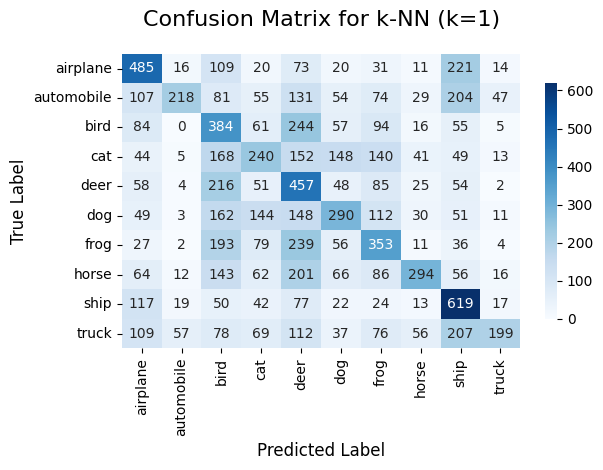

Training KNN...
Accuracy: 0.3539

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.48      0.45      1000
           1       0.65      0.22      0.33      1000
           2       0.24      0.38      0.30      1000
           3       0.29      0.24      0.26      1000
           4       0.25      0.46      0.32      1000
           5       0.36      0.29      0.32      1000
           6       0.33      0.35      0.34      1000
           7       0.56      0.29      0.39      1000
           8       0.40      0.62      0.49      1000
           9       0.61      0.20      0.30      1000

    accuracy                           0.35     10000
   macro avg       0.41      0.35      0.35     10000
weighted avg       0.41      0.35      0.35     10000



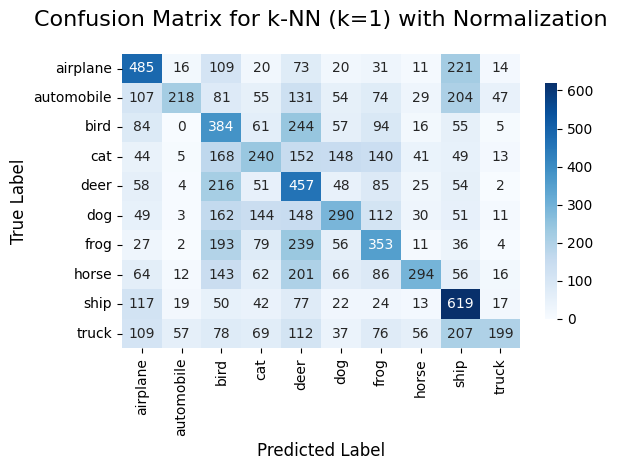

Applying PCA (100 components)...
Training KNN...
Accuracy: 0.3855

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.51      0.47      1000
           1       0.59      0.31      0.41      1000
           2       0.27      0.40      0.32      1000
           3       0.31      0.24      0.27      1000
           4       0.28      0.43      0.34      1000
           5       0.39      0.29      0.33      1000
           6       0.34      0.45      0.39      1000
           7       0.54      0.36      0.43      1000
           8       0.45      0.58      0.51      1000
           9       0.57      0.28      0.37      1000

    accuracy                           0.39     10000
   macro avg       0.42      0.39      0.38     10000
weighted avg       0.42      0.39      0.38     10000



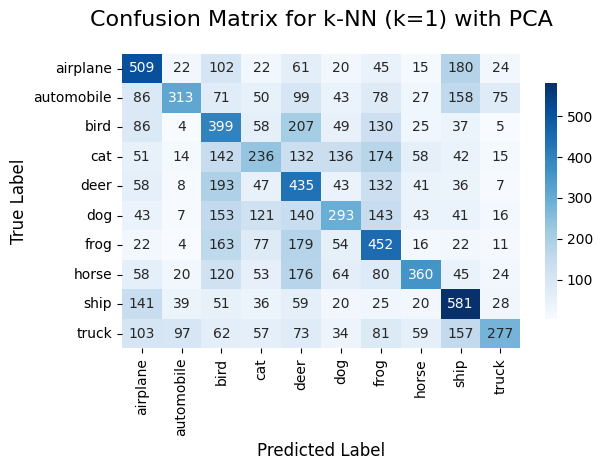

Training KNN...
Accuracy: 0.3303

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.57      0.41      1000
           1       0.58      0.24      0.34      1000
           2       0.20      0.45      0.28      1000
           3       0.26      0.23      0.24      1000
           4       0.25      0.44      0.32      1000
           5       0.43      0.21      0.28      1000
           6       0.36      0.23      0.28      1000
           7       0.73      0.20      0.31      1000
           8       0.44      0.61      0.51      1000
           9       0.73      0.12      0.21      1000

    accuracy                           0.33     10000
   macro avg       0.43      0.33      0.32     10000
weighted avg       0.43      0.33      0.32     10000



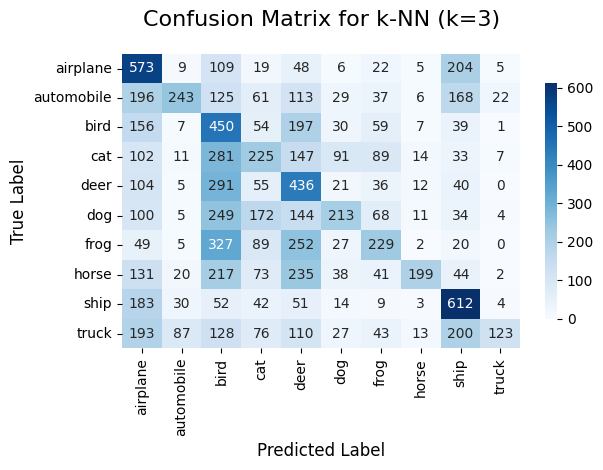

Training KNN...
Accuracy: 0.3303

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.57      0.41      1000
           1       0.58      0.24      0.34      1000
           2       0.20      0.45      0.28      1000
           3       0.26      0.23      0.24      1000
           4       0.25      0.44      0.32      1000
           5       0.43      0.21      0.28      1000
           6       0.36      0.23      0.28      1000
           7       0.73      0.20      0.31      1000
           8       0.44      0.61      0.51      1000
           9       0.73      0.12      0.21      1000

    accuracy                           0.33     10000
   macro avg       0.43      0.33      0.32     10000
weighted avg       0.43      0.33      0.32     10000



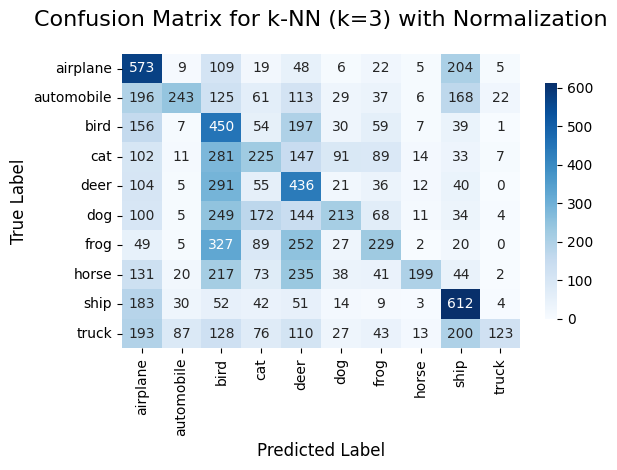

Applying PCA (100 components)...
Training KNN...
Accuracy: 0.3681

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.59      0.43      1000
           1       0.56      0.37      0.44      1000
           2       0.22      0.46      0.30      1000
           3       0.29      0.23      0.26      1000
           4       0.27      0.41      0.33      1000
           5       0.47      0.21      0.29      1000
           6       0.39      0.37      0.38      1000
           7       0.69      0.26      0.38      1000
           8       0.50      0.57      0.53      1000
           9       0.71      0.21      0.32      1000

    accuracy                           0.37     10000
   macro avg       0.44      0.37      0.37     10000
weighted avg       0.44      0.37      0.37     10000



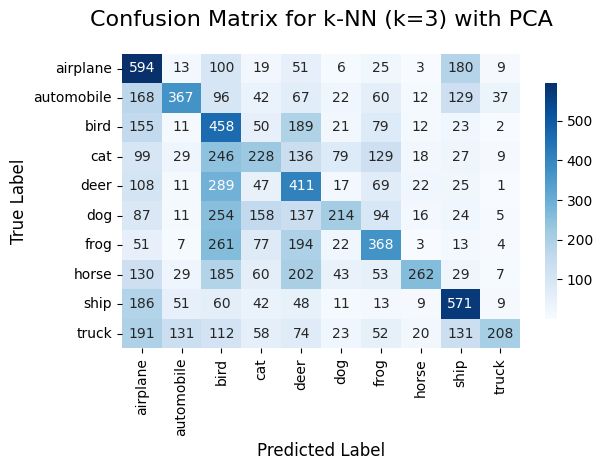

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


def knn(k,x_train_flat,y_train,x_test_flat,y_test,PCA_TR,normalization):
    ''' 
    
    '''
    if normalization==1:
        x_train_flat = x_train_flat / 255.0
        x_test_flat = x_test_flat / 255.0
    elif PCA_TR==1:
        print("Applying PCA (100 components)...")
        pca = PCA(n_components=100)
        x_train_flat = pca.fit_transform(x_train_flat)
        x_test_flat = pca.transform(x_test_flat)
    
    print("Training KNN...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)   # use smaller subset for speed
    y_pred = knn.predict(x_test_flat)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    #plt.figure(figsize=(12, 10))

    # Define class names for CIFAR-10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']

    # Create heatmap with annotations and proper labels
    sns.heatmap(cm,cmap='Blues',annot=True, # Show values in cells
                fmt='d',  # Format as integers
                xticklabels=class_names,
                yticklabels=class_names,
                annot_kws={'size': 10},  # Annotation font size
                cbar_kws={'shrink': 0.8}) # Color bar size

    plt.title(f'Confusion Matrix for k-NN (k={k}){" with PCA" if PCA_TR == 1 else ""}{" with Normalization" if normalization == 1 else ""}', fontsize=16, pad=20)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)


    # Ensure layout doesn't cut off labels
    plt.tight_layout()
    plt.show()

# 1️ Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

# 2️ Flatten images from (32,32,3) → (3072,)
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

knn(1,x_train_flat,y_train,x_test_flat,y_test,0,0)
knn(1,x_train_flat,y_train,x_test_flat,y_test,0,1)
knn(1,x_train_flat,y_train,x_test_flat,y_test,1,0)
knn(3,x_train_flat,y_train,x_test_flat,y_test,0,0)
knn(3,x_train_flat,y_train,x_test_flat,y_test,0,1)
knn(3,x_train_flat,y_train,x_test_flat,y_test,1,0)

Training NC...
Accuracy: 0.2774

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.54      0.36      1000
           1       0.28      0.19      0.22      1000
           2       0.28      0.11      0.16      1000
           3       0.27      0.06      0.09      1000
           4       0.28      0.12      0.17      1000
           5       0.27      0.29      0.28      1000
           6       0.22      0.54      0.31      1000
           7       0.27      0.17      0.20      1000
           8       0.42      0.37      0.39      1000
           9       0.33      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



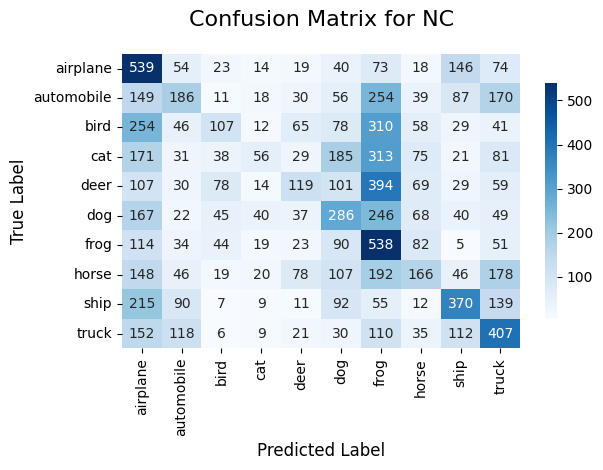

Training NC...
Accuracy: 0.2774

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.54      0.36      1000
           1       0.28      0.19      0.22      1000
           2       0.28      0.11      0.16      1000
           3       0.27      0.06      0.09      1000
           4       0.28      0.12      0.17      1000
           5       0.27      0.29      0.28      1000
           6       0.22      0.54      0.31      1000
           7       0.27      0.17      0.20      1000
           8       0.42      0.37      0.39      1000
           9       0.33      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



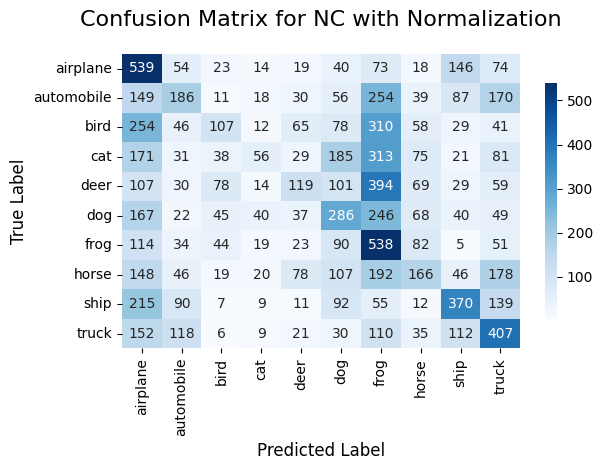

Applying PCA (100 components)...
Training NC...
Accuracy: 0.2766

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.54      0.36      1000
           1       0.28      0.19      0.23      1000
           2       0.28      0.11      0.16      1000
           3       0.26      0.06      0.09      1000
           4       0.27      0.12      0.16      1000
           5       0.27      0.29      0.28      1000
           6       0.22      0.54      0.31      1000
           7       0.26      0.16      0.20      1000
           8       0.42      0.37      0.39      1000
           9       0.32      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



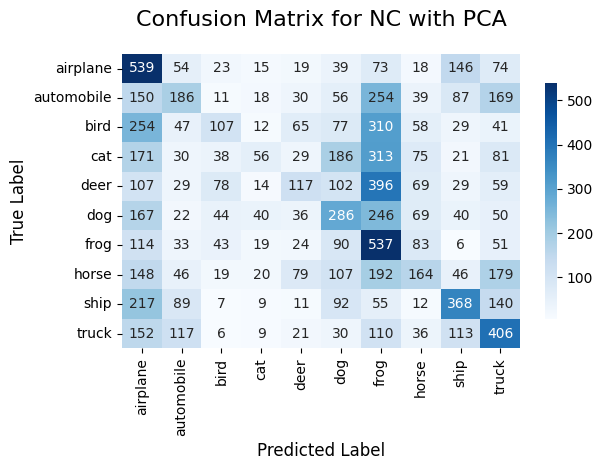

In [10]:
from sklearn.neighbors import NearestCentroid
def ncc(x_train_flat,y_train,x_test_flat,y_test,PCA_TR,normalization):
    ''' 
    
    '''
    if normalization==1:
        x_train_flat = x_train_flat / 255.0
        x_test_flat = x_test_flat / 255.0
    elif PCA_TR==1:
        print("Applying PCA (100 components)...")
        pca = PCA(n_components=100)
        x_train_flat = pca.fit_transform(x_train_flat)
        x_test_flat = pca.transform(x_test_flat)
    
    # 2 Train NC classifier
    print("Training NC...")
    nc = NearestCentroid()
    nc.fit(x_train_flat, y_train)   # use smaller subset for speed
    y_pred = nc.predict(x_test_flat)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    #plt.figure(figsize=(12, 10))

    # Define class names for CIFAR-10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']

    # Create heatmap with annotations and proper labels
    sns.heatmap(cm,cmap='Blues',annot=True, # Show values in cells
                fmt='d',  # Format as integers
                xticklabels=class_names,
                yticklabels=class_names,
                annot_kws={'size': 10},  # Annotation font size
                cbar_kws={'shrink': 0.8}) # Color bar size

    plt.title(f'Confusion Matrix for NC{" with PCA" if PCA_TR == 1 else ""}{" with Normalization" if normalization == 1 else ""}', fontsize=16, pad=20)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)


    # Ensure layout doesn't cut off labels
    plt.tight_layout()
    plt.show()
# 1️ Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()


# 2️ Flatten images from (32,32,3) → (3072,)
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)



ncc(x_train_flat,y_train,x_test_flat,y_test,0,0)
ncc(x_train_flat,y_train,x_test_flat,y_test,0,1)
ncc(x_train_flat,y_train,x_test_flat,y_test,1,0)